In [4]:
# https://bookdown.org/dusadrian/QCAbook/
library(QCA)

In [5]:
# https://rpubs.com/preimann/553549
data(LR)
data(LC)
data (LM)
data(LF)

LR are the raw data, LC is a crisp set, LM is a multi-value fuzzy set, and LF a fuzzy set version of LR.

A data frame containing 18 rows and the following 6 columns:

- DEV
Level of development: it is the GDP per capita (USD) in the raw data, calibrated in the binary crisp version to 0 if below 550 USD and 1 otherwise. For the multi-value crisp version, two thresholds were used: 550 and 850 USD.
- URB
Level of urbanization: percent of the population in towns with 20000 or more inhabitants, calibrated in the crisp versions to 0 if below 50% and 1 if above.
- LIT
Level of literacy: percent of the literate population, calibrated in the crisp versions to 0 if below 75% and 1 if above.
- IND
Level of industrialization: percent of the industrial labor force, calibrated in the crisp versions to 0 if below 30% and 1 if above.
- STB

    + Government stability: a “political-institutional” condition added to the previous four “socioeconomic” ones. The raw data has the number of cabinets which governed in the period under study, calibrated in the crisp versions to 0 if 10 or above and to 1 if below 10.
- SURV
    + Outcome: survival of democracy during the inter-war period: calibrated to 0 if negative, and 1 if positive raw data.
Switching to the naming style in the tutorial:

In [6]:
LR

,DEV,URB,LIT,IND,STB,SURV
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
AU,720,33.4,98.0,33.4,10,-9
BE,1098,60.5,94.4,48.9,4,10
CZ,586,69.0,95.9,37.4,6,7
EE,468,28.5,95.0,14.0,6,-6
FI,590,22.0,99.1,22.0,9,4
FR,983,21.2,96.2,34.8,5,10
DE,795,56.5,98.0,40.4,11,-9
GR,390,31.1,59.2,28.1,10,-8
HU,424,36.3,85.0,21.6,13,-1


## Construcnting Truth Table

In [9]:
truthTable(LC, outcome = "SURV", complete = TRUE, show.cases = TRUE)


  OUT: output value
    n: number of cases in configuration
 incl: sufficiency inclusion score
  PRI: proportional reduction in inconsistency

     DEV URB LIT IND STB   OUT    n  incl  PRI   cases      
 1    0   0   0   0   0     0     3  0.000 0.000 GR,PT,ES   
 2    0   0   0   0   1     0     2  0.000 0.000 IT,RO      
 3    0   0   0   1   0     ?     0    -     -              
 4    0   0   0   1   1     ?     0    -     -              
 5    0   0   1   0   0     0     2  0.000 0.000 HU,PL      
 6    0   0   1   0   1     0     1  0.000 0.000 EE         
 7    0   0   1   1   0     ?     0    -     -              
 8    0   0   1   1   1     ?     0    -     -              
 9    0   1   0   0   0     ?     0    -     -              
10    0   1   0   0   1     ?     0    -     -              
11    0   1   0   1   0     ?     0    -     -              
12    0   1   0   1   1     ?     0    -     -              
13    0   1   1   0   0     ?     0    -     -              
14

In [10]:
truthTable(LC, outcome = "SURV", conditions = "DEV, URB, LIT, IND, STB", 
    complete = TRUE, show.cases = TRUE)


  OUT: output value
    n: number of cases in configuration
 incl: sufficiency inclusion score
  PRI: proportional reduction in inconsistency

     DEV URB LIT IND STB   OUT    n  incl  PRI   cases      
 1    0   0   0   0   0     0     3  0.000 0.000 GR,PT,ES   
 2    0   0   0   0   1     0     2  0.000 0.000 IT,RO      
 3    0   0   0   1   0     ?     0    -     -              
 4    0   0   0   1   1     ?     0    -     -              
 5    0   0   1   0   0     0     2  0.000 0.000 HU,PL      
 6    0   0   1   0   1     0     1  0.000 0.000 EE         
 7    0   0   1   1   0     ?     0    -     -              
 8    0   0   1   1   1     ?     0    -     -              
 9    0   1   0   0   0     ?     0    -     -              
10    0   1   0   0   1     ?     0    -     -              
11    0   1   0   1   0     ?     0    -     -              
12    0   1   0   1   1     ?     0    -     -              
13    0   1   1   0   0     ?     0    -     -              
14

In [11]:
truthTable(LC, outcome = "SURV", show.cases = TRUE, sort.by = "incl, n+")



  OUT: output value
    n: number of cases in configuration
 incl: sufficiency inclusion score
  PRI: proportional reduction in inconsistency

     DEV URB LIT IND STB   OUT    n  incl  PRI   cases      
22    1   0   1   0   1     1     2  1.000 1.000 FI,IE      
24    1   0   1   1   1     1     2  1.000 1.000 FR,SE      
32    1   1   1   1   1     1     4  1.000 1.000 BE,CZ,NL,UK
 6    0   0   1   0   1     0     1  0.000 0.000 EE         
23    1   0   1   1   0     0     1  0.000 0.000 AU         
31    1   1   1   1   0     0     1  0.000 0.000 DE         
 2    0   0   0   0   1     0     2  0.000 0.000 IT,RO      
 5    0   0   1   0   0     0     2  0.000 0.000 HU,PL      
 1    0   0   0   0   0     0     3  0.000 0.000 GR,PT,ES   


## Logical Minimization

In [12]:
ttLC <- truthTable(LC, outcome = "SURV", incl.cut = 0.9, show.cases = TRUE)


In [13]:
consLC <- minimize(ttLC, details = TRUE)
consLC



M1: DEV*~URB*LIT*STB + DEV*LIT*IND*STB <-> SURV

                     inclS   PRI   covS   covU   cases 
------------------------------------------------------------------- 
1  DEV*~URB*LIT*STB  1.000  1.000  0.500  0.250  FI,IE; FR,SE 
2   DEV*LIT*IND*STB  1.000  1.000  0.750  0.500  FR,SE; BE,CZ,NL,UK 
------------------------------------------------------------------- 
                 M1  1.000  1.000  1.000 


In [14]:
consLC$PIchart


,22,24,32
DEV*~URB*LIT*STB,TRUE,TRUE,FALSE
DEV*LIT*IND*STB,FALSE,TRUE,TRUE


## The Parsimonious Solution

https://bookdown.org/dusadrian/QCAbook/minimize.html#the-parsimonious-solution

In [17]:
ttLF <- truthTable(LF, outcome = "SURV", incl.cut = 0.8, show.cases = TRUE)
minimize(ttLF, include = "?")


M1: DEV*~IND + URB*STB -> SURV


In [18]:
minimize(ttLF, include = "?", details = TRUE)



M1: DEV*~IND + URB*STB -> SURV

             inclS   PRI   covS   covU   cases 
---------------------------------------------------- 
1  DEV*~IND  0.815  0.721  0.284  0.194  FI,IE 
2   URB*STB  0.874  0.845  0.520  0.430  BE,CZ,NL,UK 
---------------------------------------------------- 
         M1  0.850  0.819  0.714 


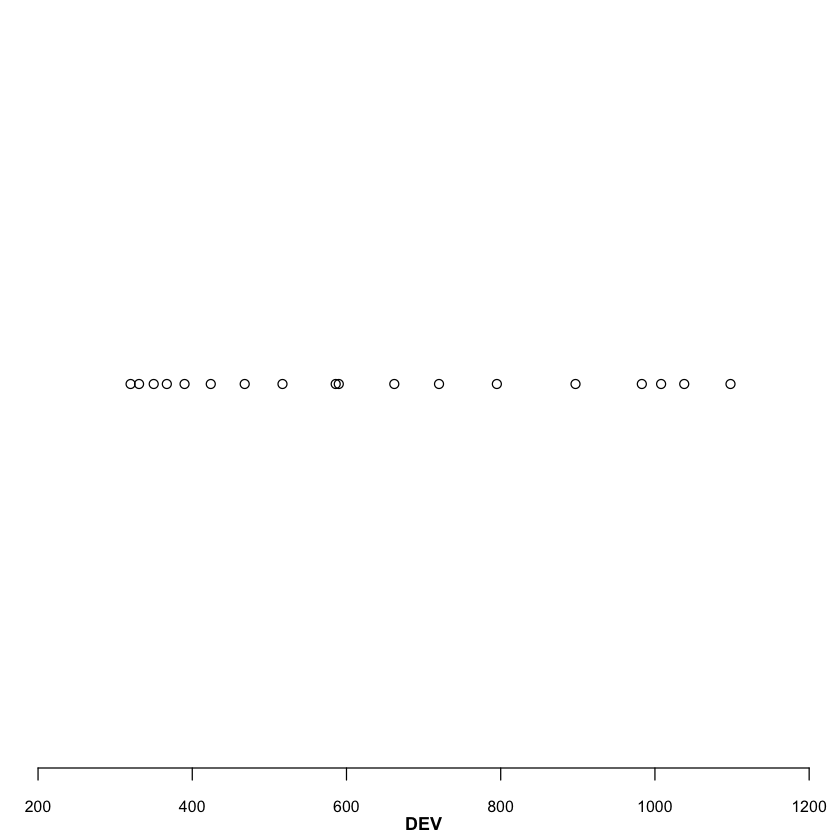

In [23]:
# Lipset's raw data
# plot the DEV (level of developent) causal condition
Xplot(LR$DEV)

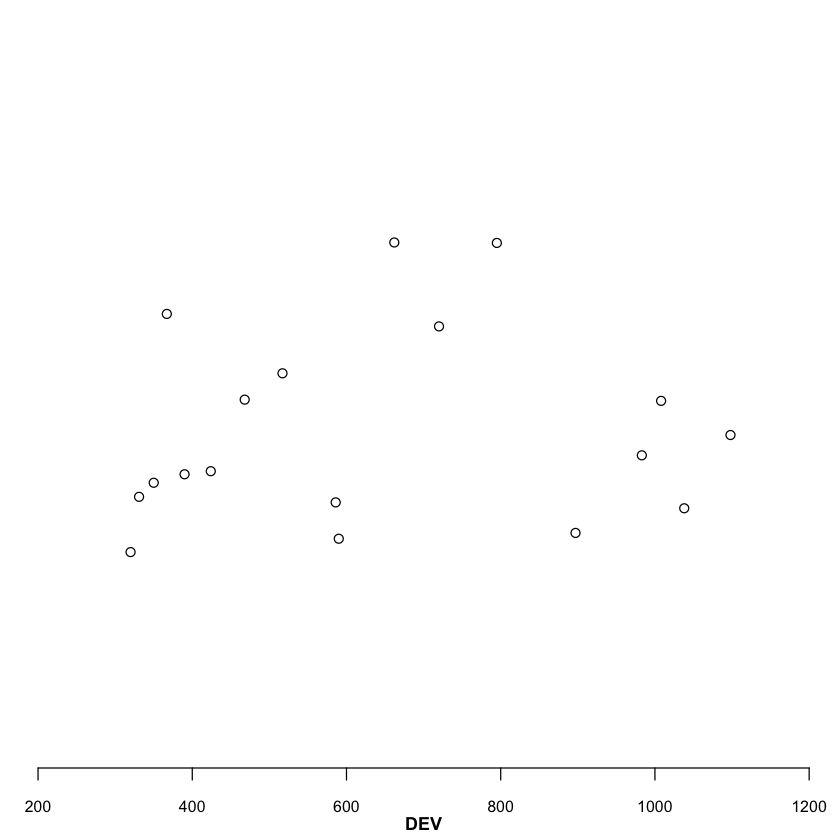

In [24]:
# jitter the points vertically
Xplot(LR$DEV, jitter = TRUE)

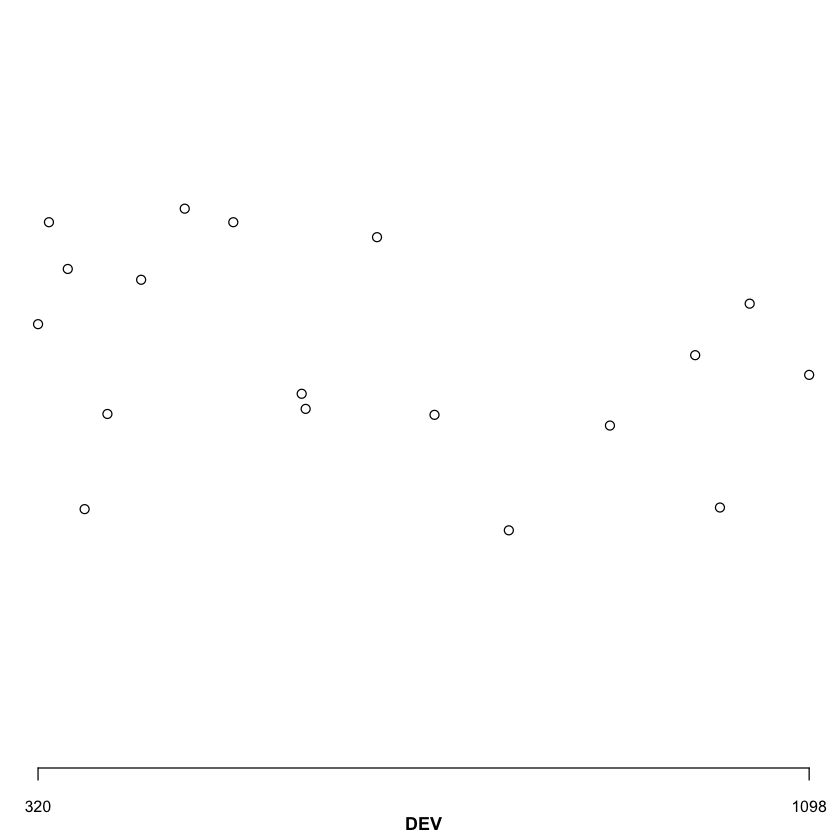

In [25]:
# clip plotting between the range of min and max
Xplot(LR$DEV, jitter = TRUE, at = range(LR$DEV))

In [27]:
mydata <- LF

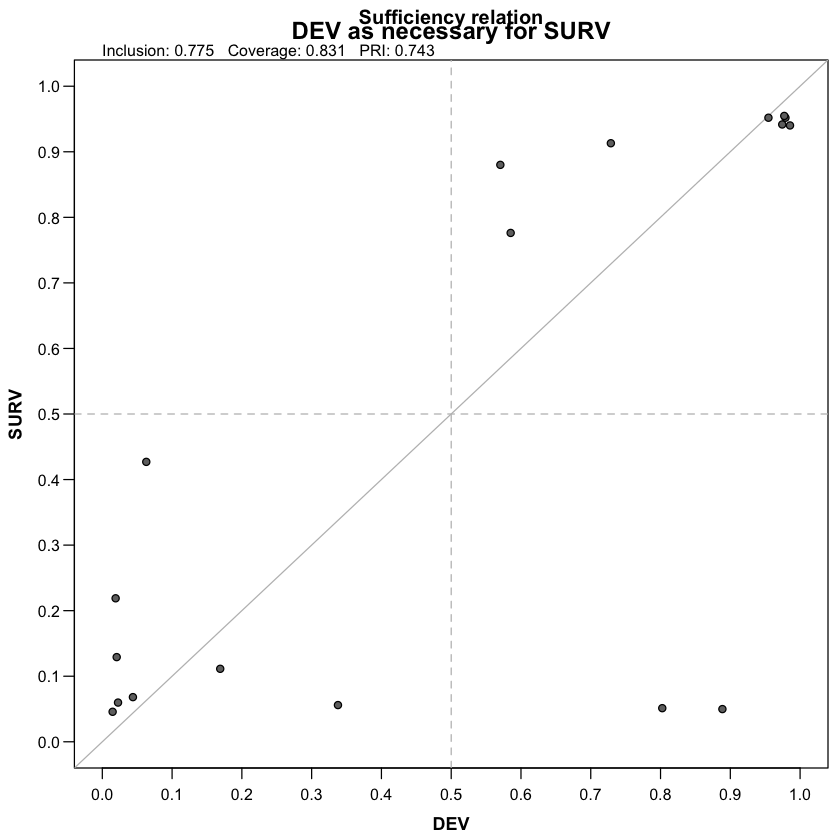

In [28]:
XYplot("DEV", "SURV", data = mydata, labs = rownames(mydata), necessity=TRUE, 
        jitter = TRUE, main = "DEV as necessary for SURV", xlab = "DEV", ylab = "SURV")